# Keras Image Classifier 

This project will explore the effects of various hyperparameters on the performance of an image classification model built with Keras. 

We will use the Fashion-MNIST dataset and optimise the model's parameters to give the best trade-off between classification accuracy and training time.

## Setting Up Notebook

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import sys
sys.path.append('models')


2.3.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14654852117166397092
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 557034857648675201
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7484416613310982734
physical_device_desc: "device: XLA_GPU device"
]


In [7]:
def plot_train_history(h, title):
    fig, axs = plt.subplots(1,2, figsize=(10,4))

    axs[0].plot(h.history["accuracy"])
    axs[0].plot(h.history["val_accuracy"])
    axs[0].legend(("train accuracy", "test accuracy"))
    axs[0].set_xlabel("epoch")
    axs[0].set_ylabel("accuracy")
    axs[0].set_title("accuracy")

    axs[1].plot(h.history["loss"])
    axs[1].plot(h.history["val_loss"])
    axs[1].legend(("train loss", "test loss"))
    axs[1].set_xlabel("epoch")
    axs[1].set_ylabel("loss")
    axs[1].set_title("loss")

    fig.suptitle(title)
    plt.show()


Loading and pre-processing images

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

## Baseline Model

In [9]:
#Training baseline model
from default_model import create_default_model

baseline = create_default_model()

history_baseline = baseline.fit(
    train_images,
    train_labels,
    verbose=0,
    epochs=100,
    validation_data=(test_images, test_labels),
)

results_baseline = baseline.evaluate(test_images, test_labels, verbose=0)
baseline.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


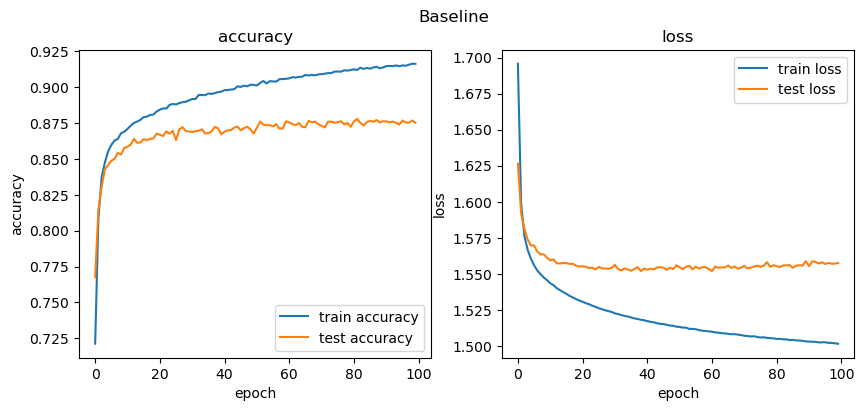

In [10]:
plot_train_history(history_baseline, "Baseline")

## Modifying Parameter Count

In [11]:
from build_model import create_model


In [12]:
# Double Width

width_doubled = create_model(num_width=128)

history_width_doubled = width_doubled.fit(
    train_images,
    train_labels,
    verbose=0,
    epochs=100,
    validation_data=(test_images, test_labels),
)

results_width_doubled = width_doubled.evaluate(test_images, test_labels, verbose=0)
width_doubled.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Additional Layer

add_layer = create_model(num_layers=2)

history_add_layer = add_layer.fit(
    train_images,
    train_labels,
    verbose=0,
    epochs=100,
    validation_data=(test_images, test_labels),
)

results_add_layer = add_layer.evaluate(test_images, test_labels, verbose=0)
width_doubled.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Parameter Count Analysis

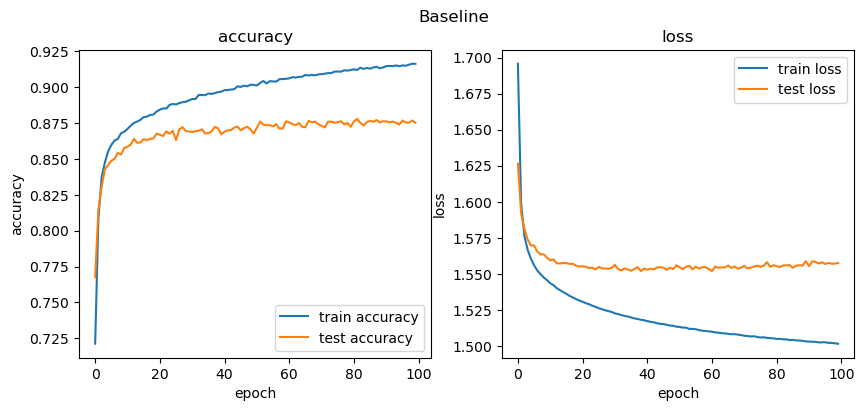

Loss, accuracy on test data:
1.5576 87.52%
Parameters: 50,890


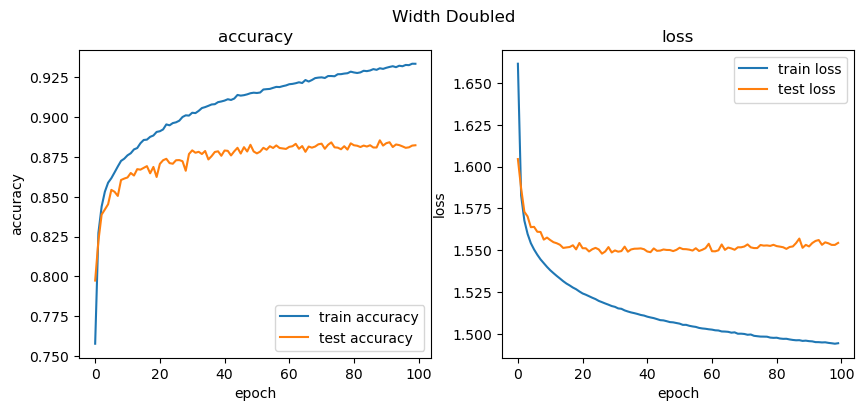

Loss, accuracy on test data:
1.5544 88.23%
Parameters: 101,770


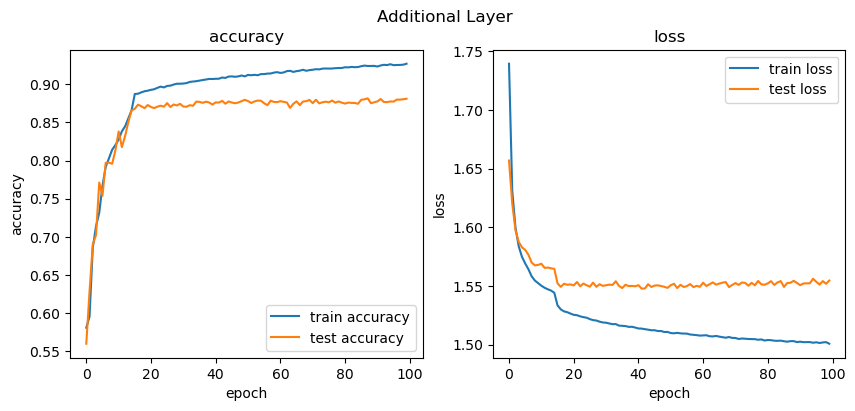

Loss, accuracy on test data:
1.5546 88.11%
Parameters: 55,050


In [14]:
plot_train_history(history_baseline, "Baseline")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_baseline[0], results_baseline[1]*100))
print("Parameters: 50,890")
plot_train_history(history_width_doubled, "Width Doubled")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_width_doubled[0], results_width_doubled[1]*100))
print("Parameters: 101,770")
plot_train_history(history_add_layer, "Additional Layer")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_add_layer[0], results_add_layer[1]*100))
print("Parameters: 55,050")

- The values for accuracy varied slightly with the wider network having slightly more accuracy.
- The deeper network is shown to be affected less by overfitting but seems to suffer from getting stuck in local maximums.
    - The wider network's light accuracy increase is likely due to the number of parameters it has. The network is able to fit the 
      training data better which results in a slight increase in accuracy. 
    - However, the large number of parameters also results in overfitting where the model fits the training data too closely
      and loses generalization, hence the model doesn't fare well against the test data. 
- The deeper network passes the inputs through an additional layer of parameters.
    - The network is able to produce an additonal layer of representation for the training data, as such it 'learns' better with 
      lesser neurons. 
    - Shallower networks with more parameters are good at memorization while deeper networks are good at generalization.

## Modifying Activation Function

In [15]:
# ReLU activation function

relu = create_model(activation='relu')

history_relu = relu.fit(train_images, 
                train_labels,
                verbose=0,
                epochs=100, 
                validation_data = (test_images, test_labels))

results_relu = relu.evaluate(test_images, test_labels, verbose=0)
relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Activation Function Analysis

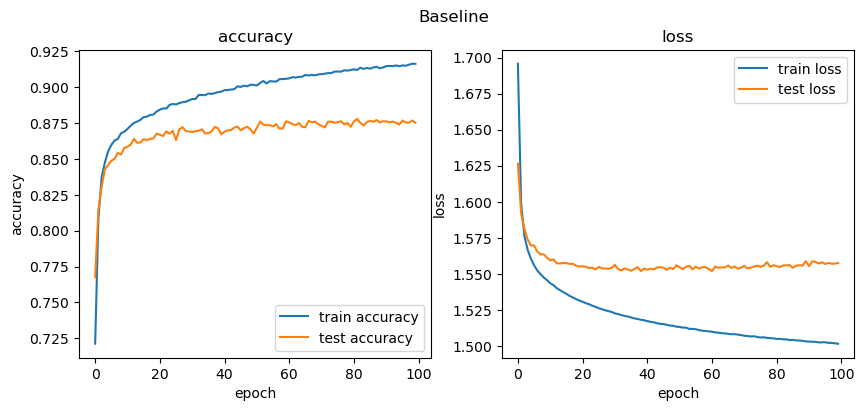

Loss, accuracy on test data:
1.5576 87.52%


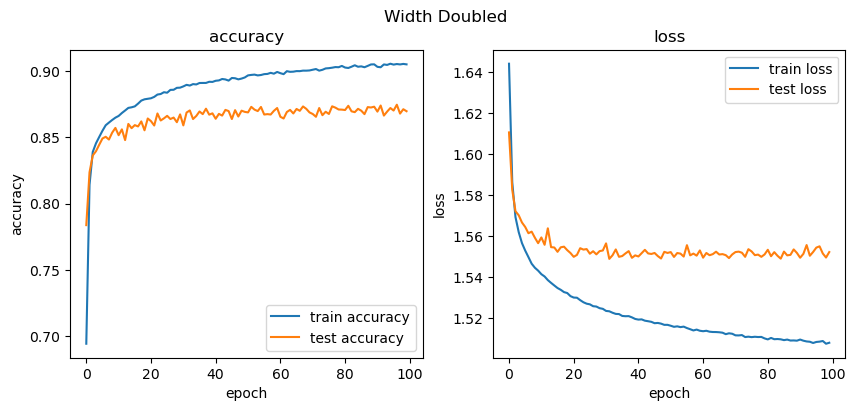

Loss, accuracy on test data:
1.5522 86.97%


In [16]:
plot_train_history(history_baseline, "Baseline")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_baseline[0], results_baseline[1]*100))

plot_train_history(history_relu, "Width Doubled")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_relu[0], results_relu[1]*100))



- Baseline(sigmoid):
    - Converged in ~30 epochs
- ReLU
    - Converged in ~10 epochs
- The ReLU network converged much faster than that of the sigmoid network.
    - This is because the ReLU activation function does not suffer from gradient saturation.
    - In a sigmoid activation function, after some epochs, the linear values will be very big or very small. These values are
      mapped to flatter portions of the sigmoid function. This results in the sigmoid gradient values being very small which 
      causes the weight changes to also be very small.
    - The ReLU activation function does not suffer from this as it's gradient has a constant value.

## Modifying Learning Rate

In [20]:
lr_increase = create_model(learning_rate=0.01)

history_lr_increase = lr_increase.fit(train_images, 
                train_labels,
                verbose=0,
                epochs=100, 
                validation_data = (test_images, test_labels))

results_lr_increase = lr_increase.evaluate(test_images, test_labels, verbose=0)
lr_increase.summary()

lr_decrease = create_model(learning_rate=0.0001)

history_lr_decrease = lr_decrease.fit(train_images, 
                train_labels,
                verbose=0,
                epochs=100, 
                validation_data = (test_images, test_labels))

results_lr_decrease = lr_decrease.evaluate(test_images, test_labels, verbose=0)
lr_decrease.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                50240     
____________________________

### Learning Rate Analysis

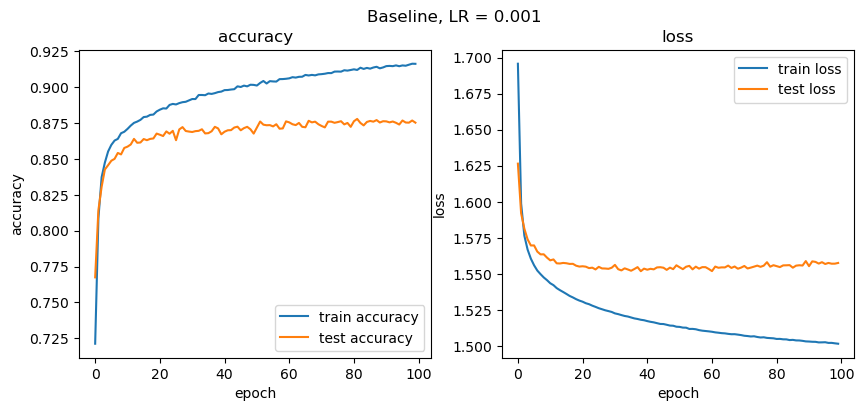

Loss, accuracy on test data:
1.5576 87.52%


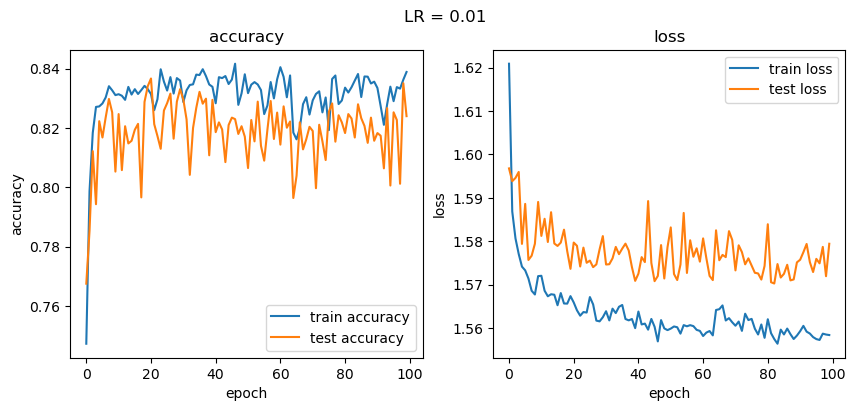

Loss, accuracy on test data:
1.5794 82.40%


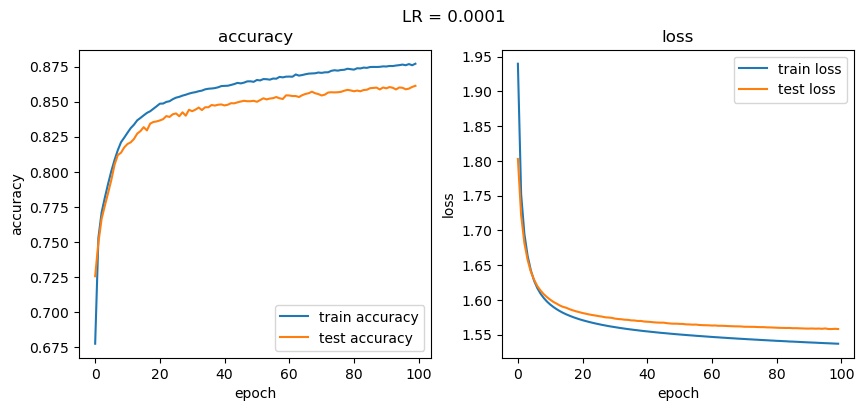

Loss, accuracy on test data:
1.5581 86.13%


In [21]:
plot_train_history(history_baseline, "Baseline, LR = 0.001")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_baseline[0], results_baseline[1]*100))

plot_train_history(history_lr_increase, "LR = 0.01")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_lr_increase[0], results_lr_increase[1]*100))

plot_train_history(history_lr_decrease, "LR = 0.0001")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_lr_decrease[0], results_lr_decrease[1]*100))


- A tenfold increase in learning rate shows a large increase in oscillation but a very fast convergence rate and less overfitting. 
- A tenfold decrease shows less oscillation and less overfitting but a slower convergence rate
- Both cases showed a decrease in accuracy, with the increased learning rate having the worst.
- Learning rate directly affects the rate of change of the parameters. 
- When decreasing the learning rate, the parameter adjustments are smaller and hence the convergence rate is smaller.
    - As the convergence rate is smaller, the perceived effect of overfitting is lessened in the graphs which only show
      the first 100 epochs.
    - Extending the number of epochs further would show that the model still overfits given enough epochs.

## Epoch Discussion

- The previous networks have all been run on 100 epochs and all configurations feature some form of overfitting. 
- Overfitting occurs when the model loses generalization by fitting the training data too closely.
- As the number of epochs increases, the model starts to memorize the training data instead of learning a generalization.
- Best method of managing epochs is by implementing keras early stopping callbacks.
- If the model stops increasing after a certain number of epochs, the model terminates.
    - This way, the model can be stopped before its overfits the training data but after it convergences.

## Final Network

In [24]:
# Final network

final = create_model(num_layers=2, activation="relu", learning_rate=0.0001)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
history_final = final.fit(train_images, 
                train_labels,
                verbose=0,
                epochs=100, 
                validation_data = (test_images, test_labels),
                callbacks=callback)

results_final =final.evaluate(test_images, test_labels, verbose=0)

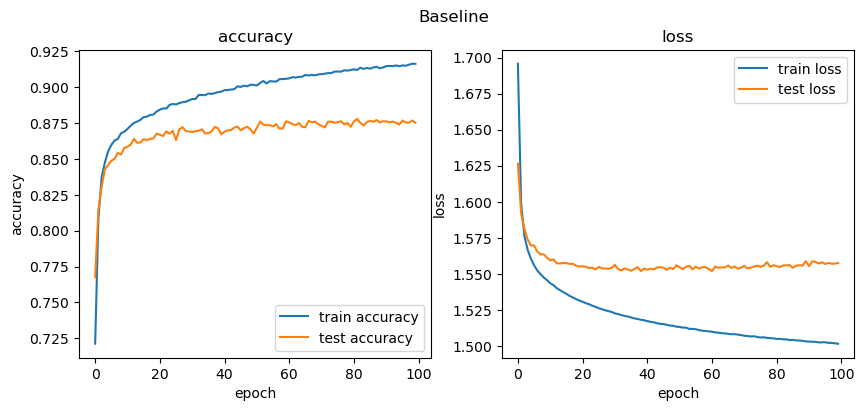

Loss, accuracy on test data:
1.5576 87.52%


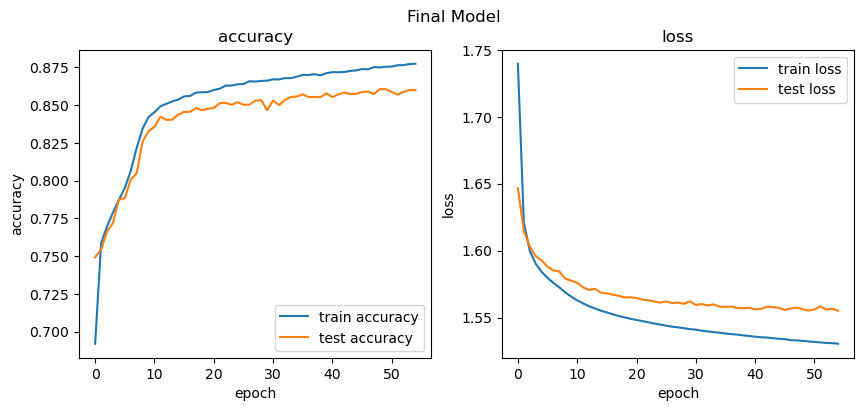

Loss, accuracy on test data:
1.5550 86.01%


In [26]:
plot_train_history(history_final, "Final Model")
print("Loss, accuracy on test data:\n%0.4f %0.2f%%" % (results_final[0], results_final[1]*100))


- This configuration gives the best accuracy without overfitting or taking a large number of epochs to train.
- Better accuracy numbers are attainable but would require a tenfold increase in time for minute gains in accuracy.
- It has:
	- 2 layers of 64 neurons
		- The 2-layer architecture gives the model a better learning capacity, reducing overfitting.
	- ReLU activation function
		- The ReLU activation function gives the model a high convergence rate and minimises the otherwise slower rate 
		of convergence produced by the lower learning rate.
	- Learning Rate: 0.0001
		- The lower learning rate results in less oscillation and gives the early stopping callback a better idea of 
		when the model has converged due to less noise.
	- Early Stopping
		- Early stopping prevents the model from overfitting and allows the network to maintain a good degree of 
		generalization